<a href="https://colab.research.google.com/github/shand07/SPH_Proj_EDA/blob/main/CommunityFindings1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

### Checking The data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/MLAFindings/CleanInvasiveDataCherokee2022CLEANER.csv', encoding='ISO-8859-1')

df.head()

### Handling missing values

In [ ]:
#Skipped first 5 rows since they were not apart of the data set
df = pd.read_csv('/content/gdrive/MyDrive/MLAFindings/CleanInvasiveDataCherokee2022CLEANER.csv', encoding='ISO-8859-1', skiprows=5 )
#trimmed off all columns that were blank
df = df.iloc[:, :25]
#trim last two rows since they were the averages and sums and are not relevant to our dataset
df = df.iloc[:-3, :]
#get rid of all empty rows
df = df.dropna()
#reset index
df = df.reset_index(drop=True)
#filled blank values with 0
df = df.fillna(0)
df.head()

### Data preprocessing (and data reading for Radj files)


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/content/gdrive/MyDrive/Colab Notebooks/CS430/Olmsted/ML Proj.xlsx"

# Read a specific sheet by name
df = pd.read_excel(file_path, sheet_name='Combined')

# Reset the index without creating a new column for the old index
df = df.reset_index(drop=True)
print(df)

# Display the dataframe
print(df)

      PLOT   TR   SA   SE  SH  Invasive Species  Early Successional Species   \
0     ARB2   42   10   18   4                 3                           47   
1     BTA1   31    9   16   4                 4                           30   
2     BAB1   38    9    8   4                 4                           41   
3    BMCD2   32   12   10   4                 3                           21   
4     BTA3   32   17   12   8                 6                           28   
5     BTA5   43   13   16   4                 3                           32   
6     BTB1   29   12   12   2                 3                           34   
7     BTB3   46   19   11   5                 7                           53   
8     BTB4   29    7   16   3                 5                           39   
9     NTB1   41   10    9   2                 3                           40   
10    NTB3   19   16   10   1                 3                           41   
11    NTC3   16    8    2   1           

In [ ]:
# prompt: define df1 as df without 12th row

df1 = df.drop(12).set_index('PLOT')
df1

TR  SA  SE  SH  Invasive Species  Early Successional Species   \
PLOT                                                                   
ARB2   42  10  18   4                 3                           47   
BTA1   31   9  16   4                 4                           30   
BAB1   38   9   8   4                 4                           41   
BMCD2  32  12  10   4                 3                           21   
BTA3   32  17  12   8                 6                           28   
BTA5   43  13  16   4                 3                           32   
BTB1   29  12  12   2                 3                           34   
BTB3   46  19  11   5                 7                           53   
BTB4   29   7  16   3                 5                           39   
NTB1   41  10   9   2                 3                           40   
NTB3   19  16  10   1                 3                           41   
NTC3   16   8   2   1                 1                           21   

       Intermediate Species  Climax Species  Shrub Species  \
PLOT                                                         
ARB2                      4               7              3   
BTA1                      4               8              3   
BAB1                      1               2              3   
BMCD2                     6              14              2   
BTA3                      6               7              4   
BTA5                      1              10              2   
BTB1                      5               3              2   
BTB3                      3               7              2   
BTB4                      1               5              2   
NTB1                      8               4              3   
NTB3                      0               4              1   
NTC3                      2               0              1   

       Understory Species  DEAD  Totals  
PLOT                                     
ARB2                    7     3      74  
BTA1                    4     7      60  
BAB1                    4     4      59  
BMCD2                   7     5      58  
BTA3                   18     0      69  
BTA5                   25     3      76  
BTB1                    3     5      55  
BTB3                    5     7      84  
BTB4                    2     1      55  
NTB1                    1     3      62  
NTB3                    4     0      53  
NTC3                    1     3      29

In [ ]:
# prompt: define df2 as df with PLOT column as index and drop TR,SA,SE,SH

# Assuming df1 is your DataFrame
df2 = df1.drop(['TR', 'SA', 'SE', 'SH'], axis=1)
df2

Invasive Species  Early Successional Species   Intermediate Species  \
PLOT                                                                         
ARB2                  3                           47                     4   
BTA1                  4                           30                     4   
BAB1                  4                           41                     1   
BMCD2                 3                           21                     6   
BTA3                  6                           28                     6   
BTA5                  3                           32                     1   
BTB1                  3                           34                     5   
BTB3                  7                           53                     3   
BTB4                  5                           39                     1   
NTB1                  3                           40                     8   
NTB3                  3                           41                     0   
NTC3                  1                           21                     2   

       Climax Species  Shrub Species  Understory Species  DEAD  Totals  
PLOT                                                                    
ARB2                7              3                   7     3      74  
BTA1                8              3                   4     7      60  
BAB1                2              3                   4     4      59  
BMCD2              14              2                   7     5      58  
BTA3                7              4                  18     0      69  
BTA5               10              2                  25     3      76  
BTB1                3              2                   3     5      55  
BTB3                7              2                   5     7      84  
BTB4                5              2                   2     1      55  
NTB1                4              3                   1     3      62  
NTB3                4              1                   4     0      53  
NTC3                0              1                   1     3      29

In [ ]:
# prompt: define df3 as df with only TR,SA,SE,SH

df3 = df1[['TR', 'SA', 'SE', 'SH']]
df3

TR  SA  SE  SH
PLOT                 
ARB2   42  10  18   4
BTA1   31   9  16   4
BAB1   38   9   8   4
BMCD2  32  12  10   4
BTA3   32  17  12   8
BTA5   43  13  16   4
BTB1   29  12  12   2
BTB3   46  19  11   5
BTB4   29   7  16   3
NTB1   41  10   9   2
NTB3   19  16  10   1
NTC3   16   8   2   1

### Experimental dataset (unusable yet)

In [ ]:
dff = pd.read_excel(file_path, sheet_name='Cherokee2022 (2)',skiprows=1)

# Reset the index without creating a new column for the old index
dff = dff.reset_index(drop=True)
# Filled blank values with 0
dff = dff.fillna(0)
dff.isna().sum()
# Rename row
dff.rename(columns={'Canopy gap and/or downed trees present':'bad environment'},inplace=True)
dff.head()

Trimble\nStation     N     E     S     W  \
0               1.0  37.0   5.0  23.0  90.0   
1               2.0   8.0   4.0   3.0   5.0   
2               3.0  10.0   6.0  13.0  17.0   
3               4.0   6.0   3.0   8.0   3.0   
4               5.0  25.0  23.0  30.0  22.0   

   Calculated using formula in densiometer  \
0                                    40.30   
1                                     5.20   
2                                    11.96   
3                                     5.20   
4                                    26.00   

   Calculated using formula in densiometer.1  Cherry  sassafrass  maple  ...  \
0                                      59.70     1.0         1.0    1.0  ...   
1                                      94.80     1.0         1.0    1.0  ...   
2                                      88.04     0.0         0.0    1.0  ...   
3                                      94.80     0.0         0.0    0.0  ...   
4                                      74.00     0.0         0.0    0.0  ...   

   Vinca minor  Euonymus fortunei  Akebia quinata  Fallopia japonica  \
0          0.0                1.0             0.0                0.0   
1          0.0                1.0             0.0                0.0   
2          0.0                1.0             0.0                0.0   
3          0.0                1.0             0.0                0.0   
4          1.0                1.0             0.0                0.0   

   Achyranthes  Hederea helix  L. maackii  Privet/ Ligustrum  Ailanthus  \
0          0.0            1.0         1.0                0.0        0.0   
1          0.0            1.0         1.0                0.0        0.0   
2          0.0            1.0         1.0                0.0        0.0   
3          0.0            1.0         1.0                0.0        0.0   
4          1.0            1.0         1.0                0.0        0.0   

   bad environment  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 142 columns]

In [ ]:
# prompt: define dff1 as dff with Trimble\nStation as index and drop first 6 columns

dff1 = dff.set_index('Trimble\nStation').iloc[:, 6:]
dff1.head()

Cherry  sassafrass  maple  hackberry  walnutash  box elder  \
Trimble\nStation                                                               
1.0                  1.0         1.0    1.0        1.0        1.0        1.0   
2.0                  1.0         1.0    1.0        0.0        0.0        1.0   
3.0                  0.0         0.0    1.0        0.0        0.0        0.0   
4.0                  0.0         0.0    0.0        0.0        0.0        1.0   
5.0                  0.0         0.0    0.0        0.0        0.0        0.0   

                  sugar  black locust  ash  tulip  ...  Vinca minor  \
Trimble\nStation                                   ...                
1.0                 1.0           0.0  1.0    0.0  ...          0.0   
2.0                 1.0           1.0  1.0    1.0  ...          0.0   
3.0                 0.0           0.0  1.0    0.0  ...          0.0   
4.0                 0.0           0.0  1.0    0.0  ...          0.0   
5.0                 0.0           0.0  1.0    0.0  ...          1.0   

                  Euonymus fortunei  Akebia quinata  Fallopia japonica  \
Trimble\nStation                                                         
1.0                             1.0             0.0                0.0   
2.0                             1.0             0.0                0.0   
3.0                             1.0             0.0                0.0   
4.0                             1.0             0.0                0.0   
5.0                             1.0             0.0                0.0   

                  Achyranthes  Hederea helix  L. maackii  Privet/ Ligustrum  \
Trimble\nStation                                                              
1.0                       0.0            1.0         1.0                0.0   
2.0                       0.0            1.0         1.0                0.0   
3.0                       0.0            1.0         1.0                0.0   
4.0                       0.0            1.0         1.0                0.0   
5.0                       1.0            1.0         1.0                0.0   

                  Ailanthus  bad environment  
Trimble\nStation                              
1.0                     0.0              1.0  
2.0                     0.0              0.0  
3.0                     0.0              0.0  
4.0                     0.0              0.0  
5.0                     0.0              0.0  

[5 rows x 135 columns]

In [ ]:
# prompt: define dff2 as dff1 without columns Lonicera japonica,	Microstegium vimineum,	Euonymus alatus,	Ampelopsis brevipedunculata,	Morus alba,	Celastrus orbiculatus	,Vinca minor,	Euonymus fortunei	,Akebia quinata	,Fallopia japonica	,Achyranthes	,Hederea helix,	L. maackii,	Privet/ Ligustrum,	Ailanthus	,Canopy gap and/or downed trees present

dff2 = dff1.drop(['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
                  'Ampelopsis brevipedunculata', 'Morus alba',
                  'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
                  'Akebia quinata', 'Fallopia japonica', 'Achyranthes',
                  'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus',
                  'bad environment'], axis=1)
dff2.head()

Cherry  sassafrass  maple  hackberry  walnutash  box elder  \
Trimble\nStation                                                               
1.0                  1.0         1.0    1.0        1.0        1.0        1.0   
2.0                  1.0         1.0    1.0        0.0        0.0        1.0   
3.0                  0.0         0.0    1.0        0.0        0.0        0.0   
4.0                  0.0         0.0    0.0        0.0        0.0        1.0   
5.0                  0.0         0.0    0.0        0.0        0.0        0.0   

                  sugar  black locust  ash  tulip  ...  coffee  juniper  \
Trimble\nStation                                   ...                    
1.0                 1.0           0.0  1.0    0.0  ...     0.0      0.0   
2.0                 1.0           1.0  1.0    1.0  ...     0.0      0.0   
3.0                 0.0           0.0  1.0    0.0  ...     0.0      0.0   
4.0                 0.0           0.0  1.0    0.0  ...     0.0      0.0   
5.0                 0.0           0.0  1.0    0.0  ...     0.0      0.0   

                  cornus.1  lindera  butternut  black cherry  ginkgo  \
Trimble\nStation                                                       
1.0                    0.0      0.0        0.0           0.0     0.0   
2.0                    0.0      0.0        0.0           0.0     0.0   
3.0                    0.0      0.0        0.0           0.0     0.0   
4.0                    0.0      0.0        0.0           0.0     0.0   
5.0                    0.0      0.0        0.0           0.0     0.0   

                  lonicera  carya.1  prunus  
Trimble\nStation                             
1.0                    0.0      0.0     0.0  
2.0                    0.0      0.0     0.0  
3.0                    0.0      0.0     0.0  
4.0                    0.0      0.0     0.0  
5.0                    0.0      0.0     0.0  

[5 rows x 119 columns]

In [ ]:
# prompt: define dff3 as dff1 with only Lonicera japonica,	Microstegium vimineum,	Euonymus alatus,	Ampelopsis brevipedunculata,	Morus alba,	Celastrus orbiculatus	,Vinca minor,	Euonymus fortunei	,Akebia quinata	,Fallopia japonica	,Achyranthes	,Hederea helix,	L. maackii,	Privet/ Ligustrum,	Ailanthus	,bad environment

dff3 = dff1[['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
             'Ampelopsis brevipedunculata', 'Morus alba',
             'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
             'Akebia quinata', 'Fallopia japonica', 'Achyranthes',
             'Hederea helix', 'L. maackii', 'Privet/ Ligustrum', 'Ailanthus',
             'bad environment']]
dff3.head()

Lonicera japonica  Microstegium vimineum  Euonymus alatus  \
Trimble\nStation                                                              
1.0                             1.0                    1.0              0.0   
2.0                             1.0                    0.0              0.0   
3.0                             1.0                    0.0              0.0   
4.0                             1.0                    0.0              0.0   
5.0                             1.0                    0.0              0.0   

                  Ampelopsis brevipedunculata  Morus alba  \
Trimble\nStation                                            
1.0                                       1.0         1.0   
2.0                                       0.0         0.0   
3.0                                       0.0         0.0   
4.0                                       1.0         0.0   
5.0                                       1.0         0.0   

                  Celastrus orbiculatus  Vinca minor  Euonymus fortunei  \
Trimble\nStation                                                          
1.0                                 1.0          0.0                1.0   
2.0                                 0.0          0.0                1.0   
3.0                                 0.0          0.0                1.0   
4.0                                 0.0          0.0                1.0   
5.0                                 0.0          1.0                1.0   

                  Akebia quinata  Fallopia japonica  Achyranthes  \
Trimble\nStation                                                   
1.0                          0.0                0.0          0.0   
2.0                          0.0                0.0          0.0   
3.0                          0.0                0.0          0.0   
4.0                          0.0                0.0          0.0   
5.0                          0.0                0.0          1.0   

                  Hederea helix  L. maackii  Privet/ Ligustrum  Ailanthus  \
Trimble\nStation                                                            
1.0                         1.0         1.0                0.0        0.0   
2.0                         1.0         1.0                0.0        0.0   
3.0                         1.0         1.0                0.0        0.0   
4.0                         1.0         1.0                0.0        0.0   
5.0                         1.0         1.0                0.0        0.0   

                  bad environment  
Trimble\nStation                   
1.0                           1.0  
2.0                           0.0  
3.0                           0.0  
4.0                           0.0  
5.0                           0.0

# Exploratory Visualizations

### Average presence of invasive species

In [ ]:
weights = {1: 0.005, 2: 0.03, 3: 0.15, 4: 0.625}

species_mean = df.iloc[:, 10:24].map(weights.get).mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=species_mean.index, y=species_mean.values, palette="viridis")
plt.title('Average presence of Invasive Species')
plt.xlabel('Invasive Species')
plt.ylabel('Average presence Score (1=Scarce, 4=Many)')
plt.xticks(rotation=90)
plt.show()





This graph shows that the most frequent invasive plant is Akebia Quinata, while the least frequent is Fallopia japonica. The high count of Akebia Quinata is most likely because it can tolerate both shade and lack of water.

### miscellaneous bar graphs


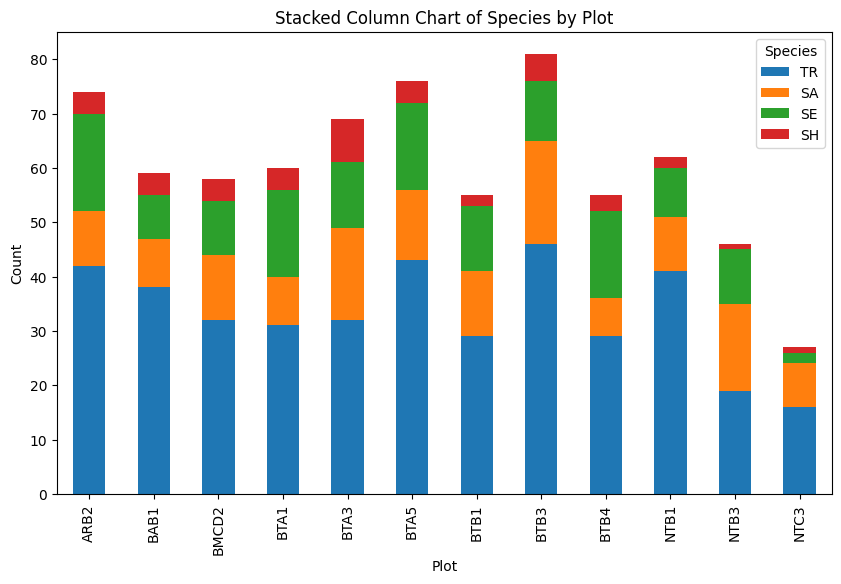

In [ ]:
# prompt: Make a stacked column chart of the TR, SA,SE,SH separated by plot

# Assuming your DataFrame 'df' has columns 'TR', 'SA', 'SE', 'SH'
# and you want to create a stacked column chart for each plot

# Group the data by plot and get the sum of each species
plot_data = df1.groupby('PLOT')[['TR', 'SA', 'SE', 'SH']].sum()

# Create a stacked column chart for each plot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Column Chart of Species by Plot')
plt.xlabel('Plot')
plt.ylabel('Count')
plt.legend(title='Species')

plt.show()

Most common type of plants in Cherokee park is trees (TR), followed by seedlings (SE) and saplings (SA), then lastly the rarest are shrubs (SH).

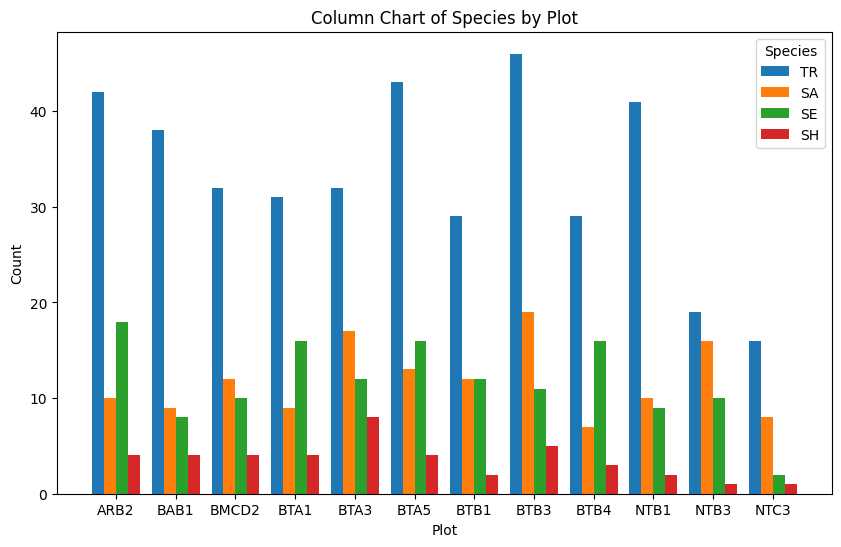

In [ ]:
# prompt: Make a column chart that is not stacked of the TR, SA,SE,SH with some distance between the columns separated by plot in one graph

# Assuming your DataFrame 'df' has columns 'TR', 'SA', 'SE', 'SH'
# and you want to create a column chart for each plot with some distance between columns

# Group the data by plot and get the sum of each species
plot_data = df1.groupby('PLOT')[['TR', 'SA', 'SE', 'SH']].sum()

# Create a column chart for each species with some distance between columns
width = 0.2  # Width of each bar
x = np.arange(len(plot_data.index))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 1.5 * width, plot_data['TR'], width, label='TR')
ax.bar(x - 0.5 * width, plot_data['SA'], width, label='SA')
ax.bar(x + 0.5 * width, plot_data['SE'], width, label='SE')
ax.bar(x + 1.5 * width, plot_data['SH'], width, label='SH')

ax.set_title('Column Chart of Species by Plot')
ax.set_xlabel('Plot')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(plot_data.index)
ax.legend(title='Species')

plt.show()

There are most trees (TR) and most saplings (SA) in plot BTB3, while most seedlings (SE) are found in plot ARB2. Most shrubs (SH) are found in BTA3.

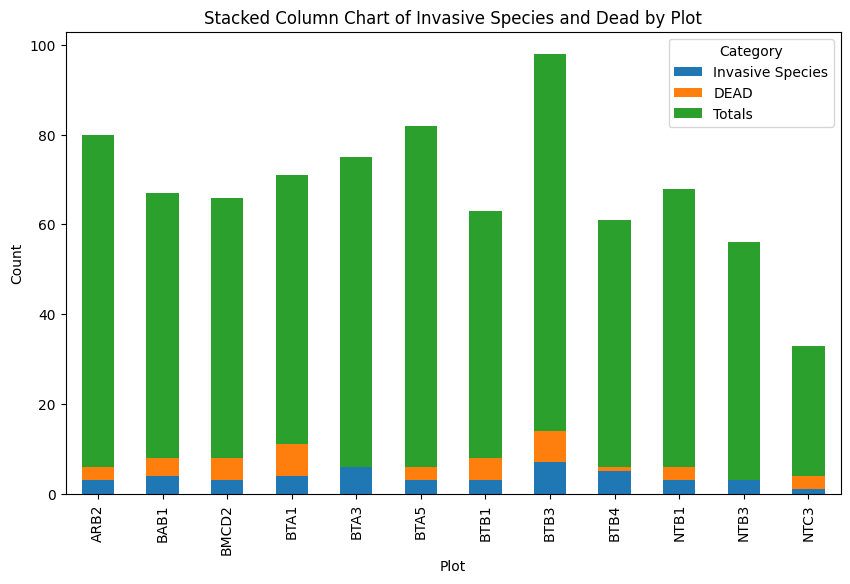

In [ ]:
# prompt: make a stacked column chart of df2[Invasive Species, DEAD] to Totals by plot

# Assuming df2 is your DataFrame and it has columns 'Invasive Species', 'DEAD', and 'Totals'
# and you want to create a stacked column chart grouped by 'plot'

# Group the data by 'plot' and sum the 'Invasive Species' and 'DEAD' columns
plot_data = df2.groupby('PLOT')[['Invasive Species', 'DEAD','Totals']].sum()

# Create a stacked column chart
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Column Chart of Invasive Species and Dead by Plot')
plt.xlabel('Plot')
plt.ylabel('Count')
plt.legend(title='Category')

plt.show()

Most bad plants (dead + invasive) are found in BTB3. Least bad plants seems to be in NTB3.

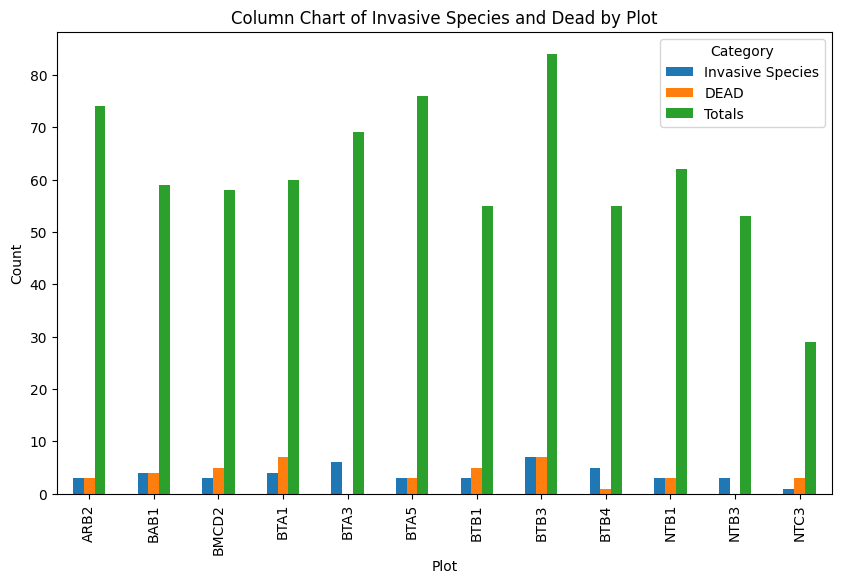

In [ ]:
# prompt: make a column chart  not stacked of df2[Invasive Species, DEAD] to Totals by plot

# Assuming df2 is your DataFrame and it has columns 'Invasive Species', 'DEAD', and 'Totals'
# and you want to create a column chart for 'Invasive Species' and 'DEAD' grouped by 'plot'

# Group the data by 'plot' and sum the 'Invasive Species' and 'DEAD' columns
plot_data = df2.groupby('PLOT')[['Invasive Species', 'DEAD','Totals']].sum()

# Create a column chart
ax = plot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Column Chart of Invasive Species and Dead by Plot')
plt.xlabel('Plot')
plt.ylabel('Count')
plt.legend(title='Category')

plt.show()

Most invasive plants are found in BTB3 where most of the dead plants are also found.

In [ ]:
df

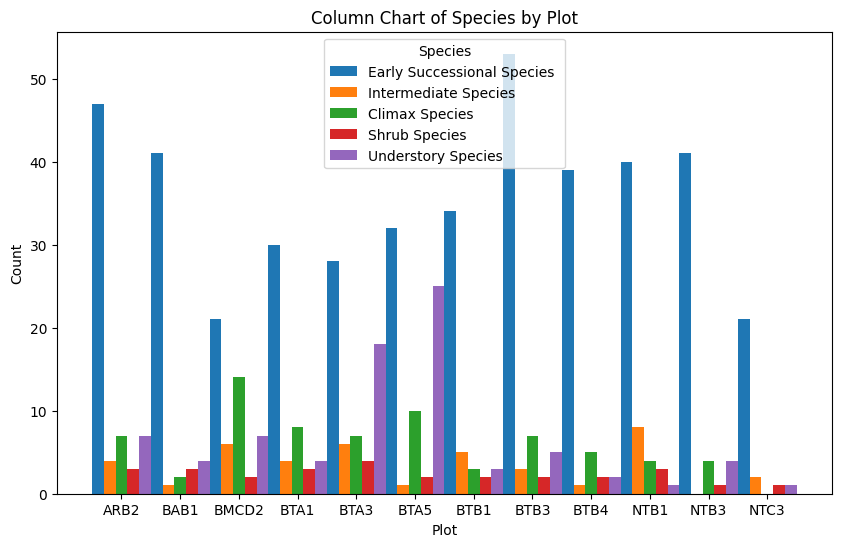

In [ ]:
# prompt: Make a column chart that is not stacked of df2 using all the columns with some distance between the columns separated by plot in one graph

# Assuming df2 is your DataFrame and you want to create a column chart for all columns
# with some distance between the columns, plotted in one graph.

#drop [['Invasive Species', 'DEAD','Totals']] first
df4 = df2.drop(['Invasive Species', 'DEAD','Totals'], axis=1)
# Group the data by plot and get the sum of each species
plot_data = df4.groupby('PLOT').sum()

# Create a column chart for each species with some distance between columns
width = 0.2  # Width of each bar
x = np.arange(len(plot_data.index))

fig, ax = plt.subplots(figsize=(10, 6))

for i, column in enumerate(plot_data.columns):
  ax.bar(x + i * width, plot_data[column], width, label=column)

ax.set_title('Column Chart of Species by Plot')
ax.set_xlabel('Plot')
ax.set_ylabel('Count')
ax.set_xticks(x + width * (len(plot_data.columns) - 1) / 2)
ax.set_xticklabels(plot_data.index)
ax.legend(title='Species')

plt.show()

Most of the plants are of the early successional species. Second most are of the understory species which are mostly found in BTA5.

### Miscellaneous heatmaps

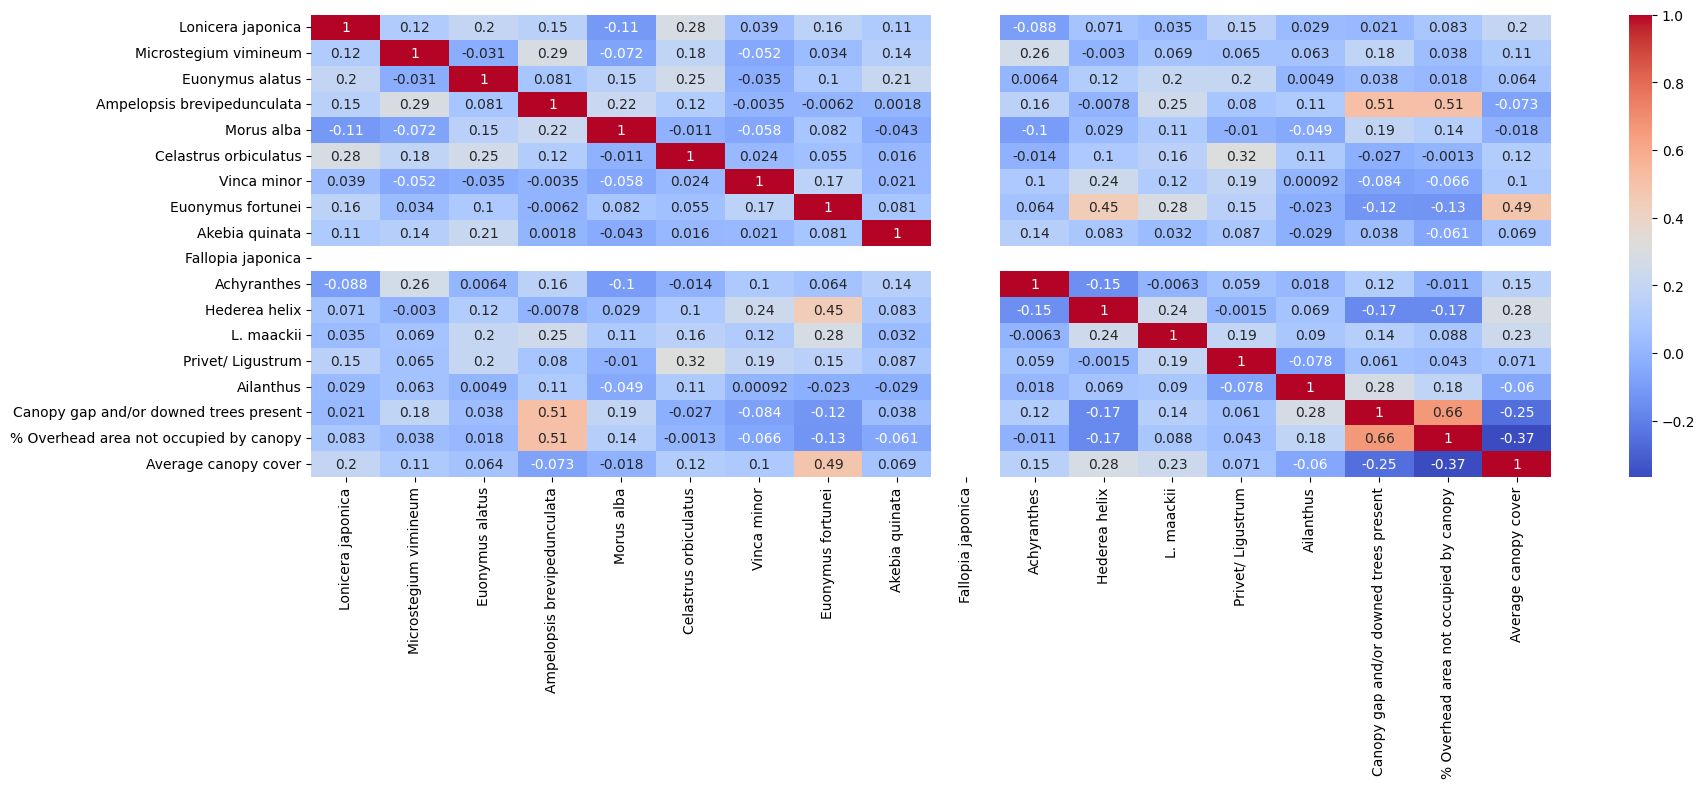

In [ ]:
#Tree_Survey = pd.read_excel('/content/drive/MyDrive/Project 1/ML Proj cleaned.xlsx', skiprows = 5)
# Load the Excel file
file_path = "/content/gdrive/MyDrive/Colab Notebooks/CS430/Olmsted/ML Proj.xlsx"

# Read a specific sheet by name
Tree_Survey = pd.read_excel(file_path, sheet_name='Cherokee2022',skiprows=5)

# Drop Unwanted columns
Tree_Survey = Tree_Survey.drop(['Canopy','Understory'], axis=1)
#Tree_Survey.head()

# Some preprocessing,renaming, and cleaning
Tree_Survey.drop(Tree_Survey.tail(2).index,inplace=True)
Tree_Survey = Tree_Survey.rename(columns={Tree_Survey.columns[0]: 'Trimble Station'})
Tree_Survey = Tree_Survey.rename(columns={Tree_Survey.columns[5]: '% Overhead area not occupied by canopy'})
Tree_Survey = Tree_Survey.rename(columns={Tree_Survey.columns[6]: 'Average canopy cover'})
Tree_Survey = Tree_Survey.drop(Tree_Survey.columns[[-1]], axis=1)
Tree_Survey = Tree_Survey.fillna(0)

# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(20, 6))
correlation_matrix = Tree_Survey[['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus',
       'Canopy gap and/or downed trees present', '% Overhead area not occupied by canopy', 'Average canopy cover']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Heatmap shows which plants are most likely to grow where, with Euonymus fortunei growing closely with the Hederea helix. Ampelopsis brevipedunculata is also most likely to grow in areas that are not cover by the canopy, most likely because it grows and sprend best in the sun.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Tree_Survey[['Euonymus fortunei',
       'Achyranthes',
       'L. maackii',
       'Lonicera japonica',
       'Morus alba',
       'Microstegium vimineum',
       'Hederea helix',
       'Celastrus orbiculatus',
       'Akebia quinata',
       'Vinca minor',
       'Ampelopsis brevipedunculata',
       'Ailanthus',
       'Euonymus alatus',
       'Privet/ Ligustrum',
       'Canopy gap and/or downed trees present']], Tree_Survey['Average canopy cover'])
print(reg.coef_)

The Linear Regression shows how the plants are most likely going to affect the canopy, with vine like plants covering more than bush like plants.

In [ ]:
# prompt: make a corr and  heatmap of df1
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has columns 'TR', 'SA', 'SE', 'SH'
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the heatmap, Invasive species take up most of the total plants in an area, with early successional species close behind. Most of the invasive plants falls into early successional species, which means it is fast growing and is usually the first plane to appear. The invasion plants also falls into shrubs. Shrubs are usually low mantained plants and spread quickly which could also add to the fact that most of the total are invasive.

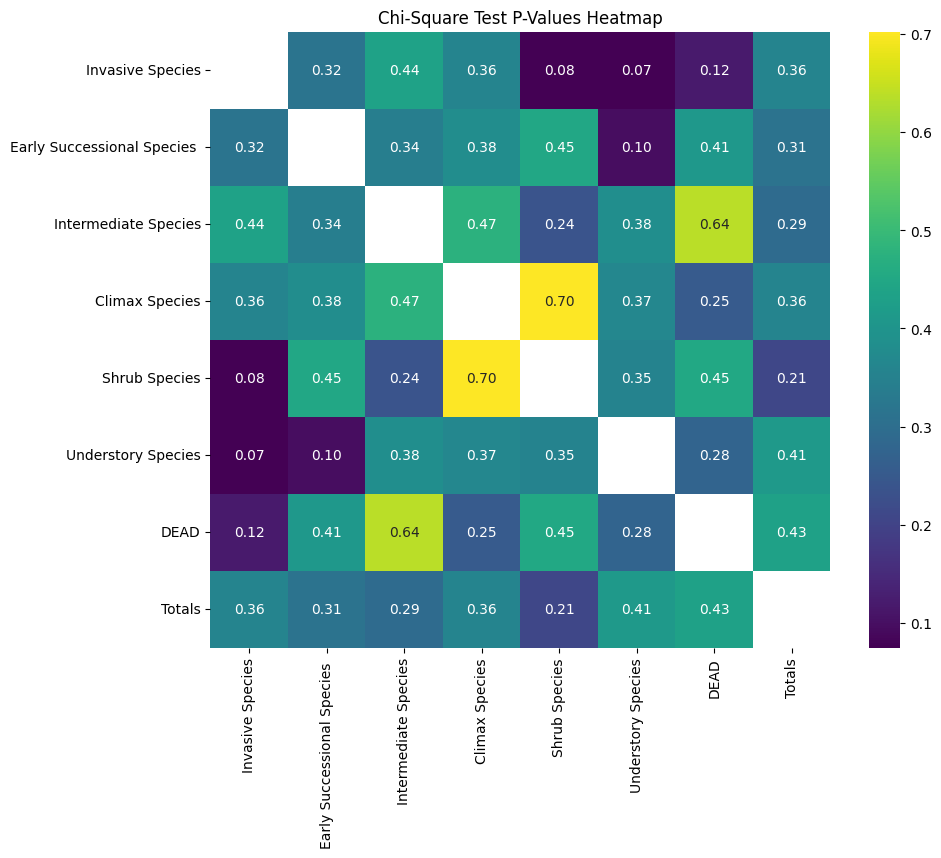

In [ ]:
# prompt: do a chi square test for each pair in df2 and graph the p-value heatmap style

from scipy.stats import chi2_contingency

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=df2.columns, columns=df2.columns)

# Iterate through each pair of columns
for col1 in df2.columns:
    for col2 in df2.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df2[col1], df2[col2])

            # Perform chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the DataFrame
            p_values_df.loc[col1, col2] = p

# Convert all values in p_values_df to numeric, errors='coerce' will replace non-numeric values with NaN
p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

# Create a heatmap of p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Chi-Square Test P-Values Heatmap')
plt.show()

The idea with this graph is to see whether there is a correlation between any of the variables (whether they are independent (H0) in influencing the test statistic). the Ha would be that they are dependent. As these are p-values, the generally accepted alpha value is 0.05. Hence, anything below 0.05 (which is not found in this graph) is worth noting.

In [ ]:
# prompt: corr and heatmap of df3 with and without bonferroni side by side

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
fig, (ax1) = plt.subplots(1, figsize=(16, 6))

# Correlation and Heatmap without Bonferroni correction
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax1)
ax1.set_title('Correlation Matrix Heatmap (Without Bonferroni)')

# Correlation and Heatmap with Bonferroni correction
# Assuming you want to perform Bonferroni correction on p-values
# You would need to adjust the significance level for the chi-square test
# based on the number of comparisons.
# Here's how you can do it:

# Example: Set the original alpha level to 0.05
alpha = 0.05
# Number of comparisons (n * (n-1) / 2)
num_comparisons = len(df3.columns) * (len(df3.columns) - 1) / 2
# Adjusted alpha level
adjusted_alpha = alpha / num_comparisons

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=df3.columns, columns=df3.columns)

# Iterate through each pair of columns
for col1 in df3.columns:
    for col2 in df3.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df3[col1], df3[col2])

            # Perform chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the DataFrame
            p_values_df.loc[col1, col2] = p

# Convert all values in p_values_df to numeric, errors='coerce' will replace non-numeric values with NaN
p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

# Apply Bonferroni correction to the p-values
p_values_df_bonferroni = p_values_df.copy()
p_values_df_bonferroni[p_values_df_bonferroni > adjusted_alpha] = 1  # Set p-values above the adjusted threshold to 1
p_values_df_bonferroni[p_values_df_bonferroni <= adjusted_alpha] = 0  # Set p-values below the adjusted threshold to 0

# Plot heatmap with Bonferroni correction
#sns.heatmap(p_values_df_bonferroni, annot=True, cmap='viridis', fmt=".2f", ax=ax2)
#ax2.set_title('Chi-Square Test P-Values Heatmap (With Bonferroni)')


plt.show()

The heatmap shows that there's a big correlation between trees (TR), with shrubs (SH) and seedlings (SE), and between sapling (SA) with shrubs (SH).

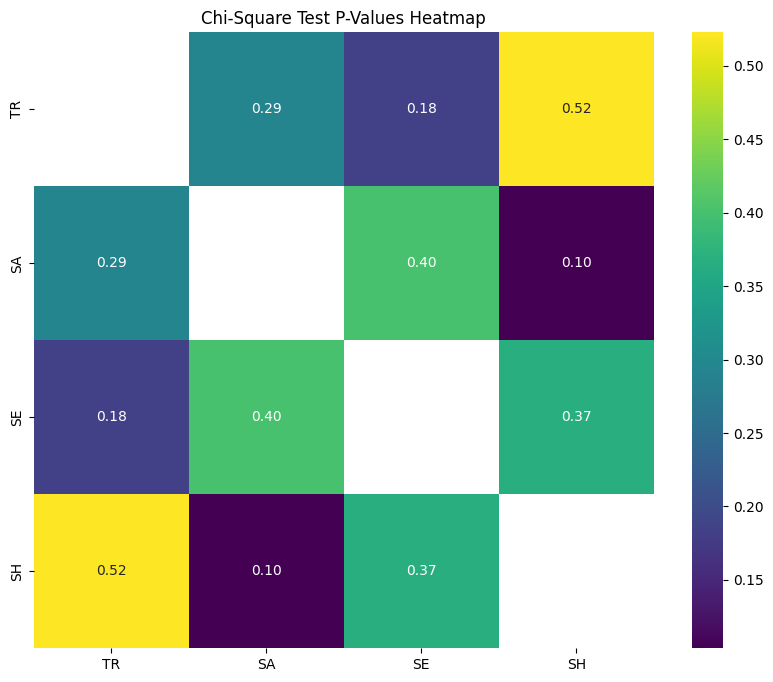

In [ ]:
# prompt: do a chi square test for each pair in df3 and graph the p-value heatmap style

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming df3 is your DataFrame
# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=df3.columns, columns=df3.columns)

# Iterate through each pair of columns
for col1 in df3.columns:
    for col2 in df3.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df3[col1], df3[col2])

            # Perform chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the DataFrame
            p_values_df.loc[col1, col2] = p

# Convert all values in p_values_df to numeric, errors='coerce' will replace non-numeric values with NaN
p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

# Create a heatmap of p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Chi-Square Test P-Values Heatmap')
plt.show()

The idea with this graph is to see whether there is a correlation between any of the variables (whether they are independent (H0) in influencing the test statistic). the Ha would be that they are dependent. As these are p-values, the generally accepted alpha value is 0.05. Hence, anything below 0.05 (which is not found in this graph) is worth noting.

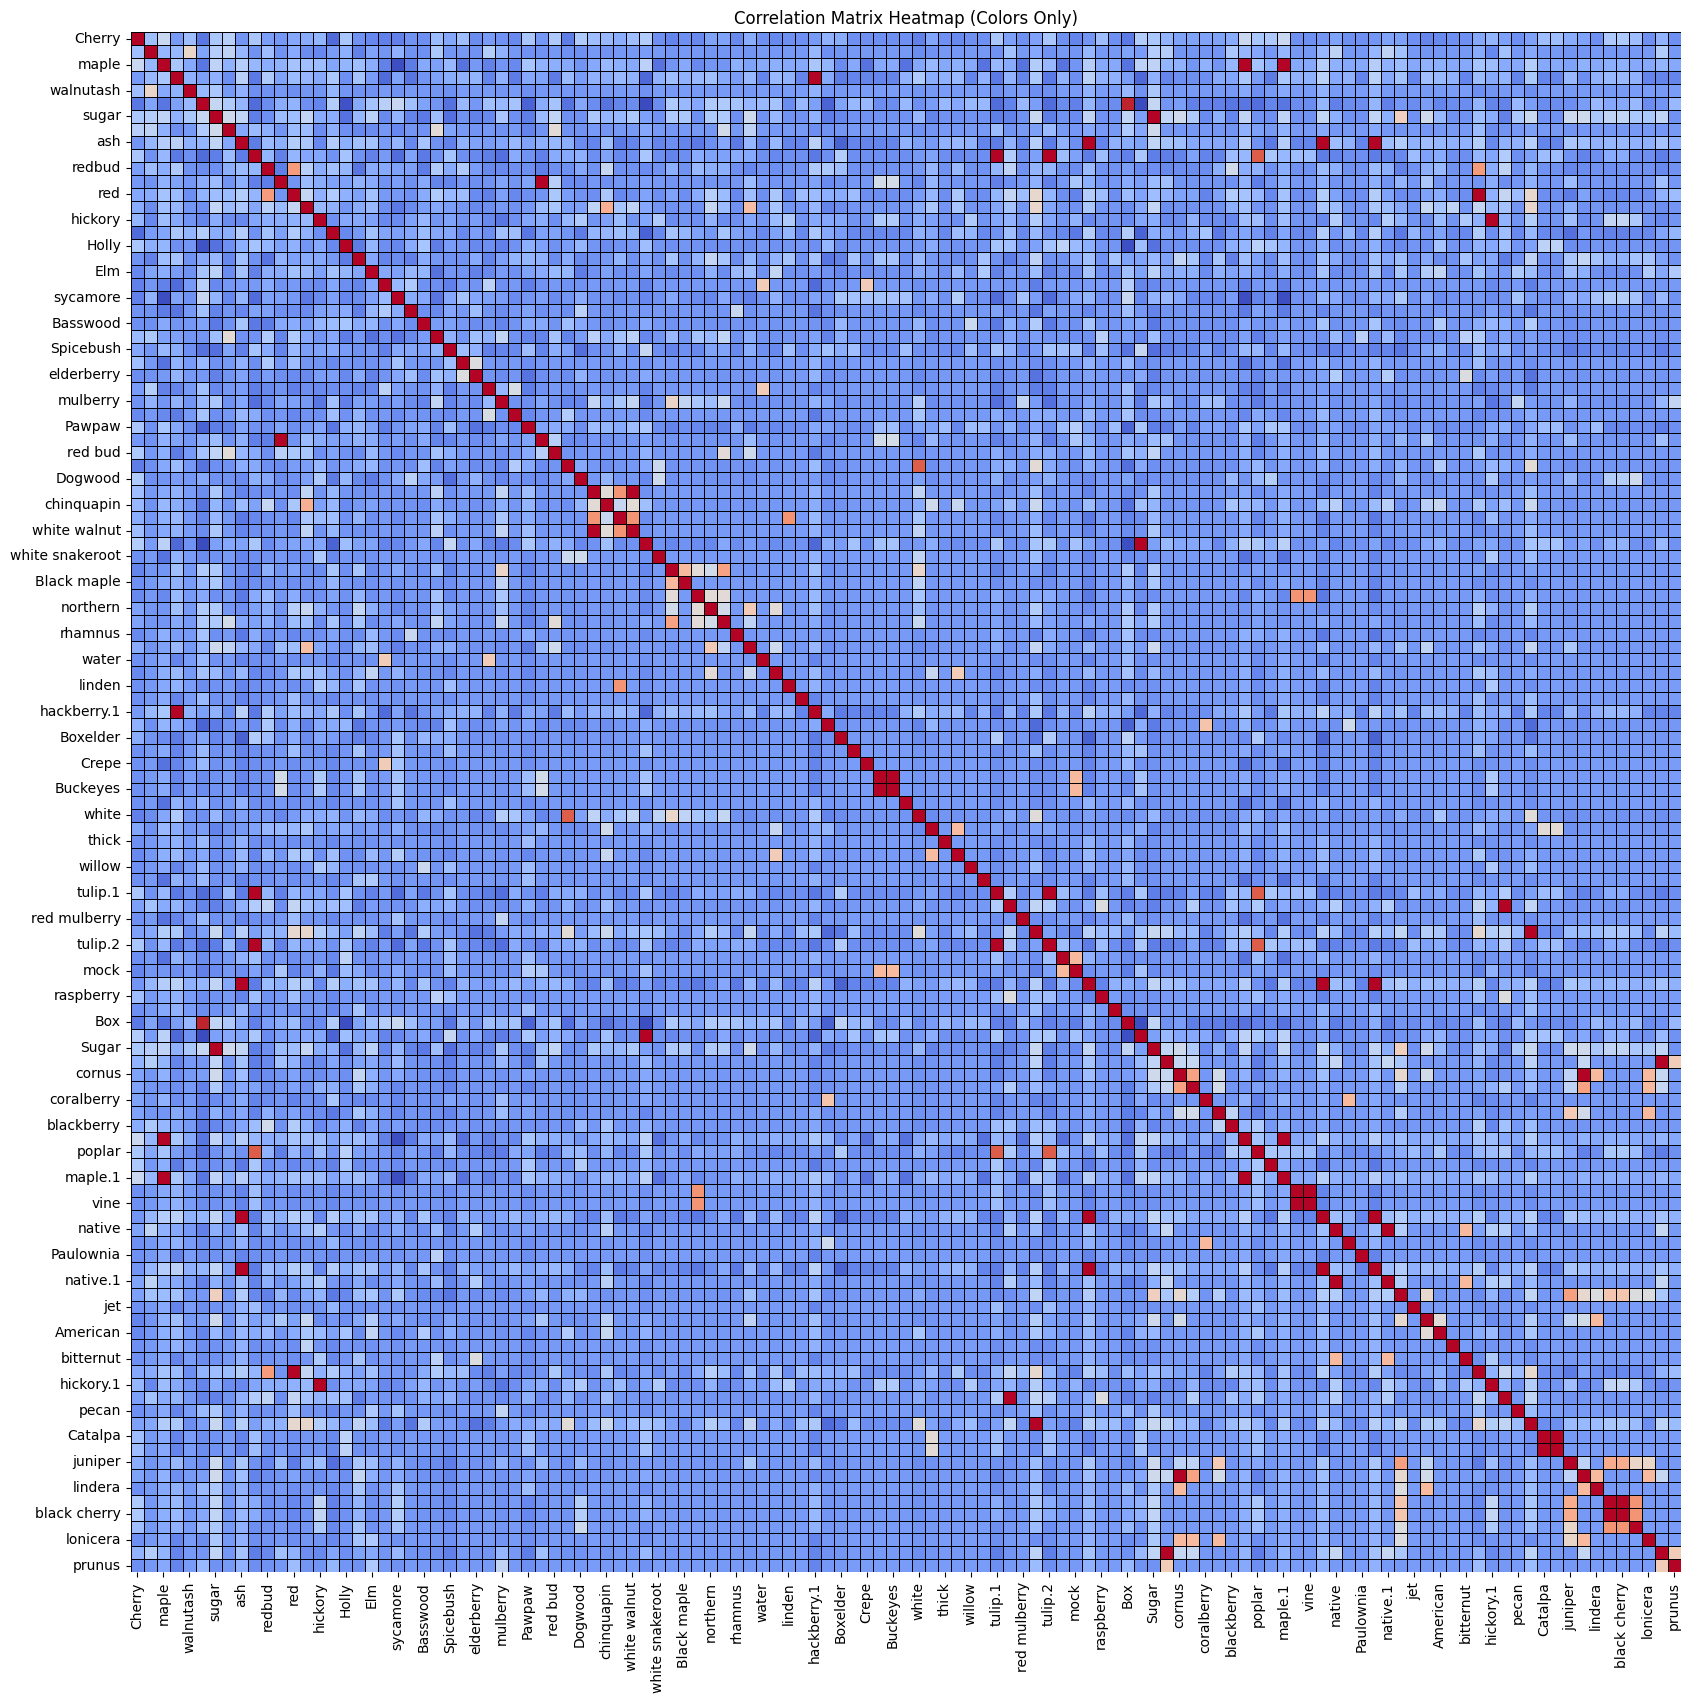

In [ ]:
# prompt: make a correlation and heatmap of dff2 without the numbers just the colors make borders for the cubes

# Assuming dff2 is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dff2.corr()

# Create a heatmap without numbers and with borders
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=False)
plt.title('Correlation Matrix Heatmap (Colors Only)')
plt.show()

In [ ]:
# prompt: from the correlation matrix above, list out the correlations that have greater absolute value than 0.5  without the NaN values and the 1.0 values

import pandas as pd
import numpy as np

# Assuming 'correlation_matrix' is your DataFrame containing the correlation matrix
# (replace with your actual DataFrame variable if it's different)

# Example:
# correlation_matrix = df2.corr()

# Iterate through the correlation matrix and find correlations > 0.5
for i in correlation_matrix.index:
  for j in correlation_matrix.columns:
    if i != j and not np.isnan(correlation_matrix.loc[i,j]) and abs(correlation_matrix.loc[i,j]) > 0.5 and correlation_matrix.loc[i,j] != 1.0:
      print(f"{i} and {j}: {correlation_matrix.loc[i,j]}")

box elder and Box: 0.9625173663565972
tulip and poplar: 0.849446245268275
redbud and red: 0.6794770327474794
redbud and Red: 0.6794770327474794
red and redbud: 0.6794770327474794
pin and chinquapin: 0.6153846153846156
pin and chinkapin: 0.5601120336112038
white oak and white: 0.8458410929196717
white pine and sumac: 0.7050719373096688
chinquapin and pin: 0.6153846153846156
sumac and white pine: 0.7050719373096688
sumac and white walnut: 0.7050719373096688
sumac and linden: 0.7050719373096688
white walnut and sumac: 0.7050719373096688
white mulberry and Black maple: 0.5740225742153455
white mulberry and yellow: 0.6608527131782943
Black maple and white mulberry: 0.5740225742153455
honey and Honeysuckle: 0.7050719373096688
honey and vine: 0.7050719373096688
northern and chinkapin: 0.5058368838196518
yellow and white mulberry: 0.6608527131782943
chinkapin and pin: 0.5601120336112038
chinkapin and northern: 0.5058368838196518
linden and sumac: 0.7050719373096688
coral and coralberry: 0.5364

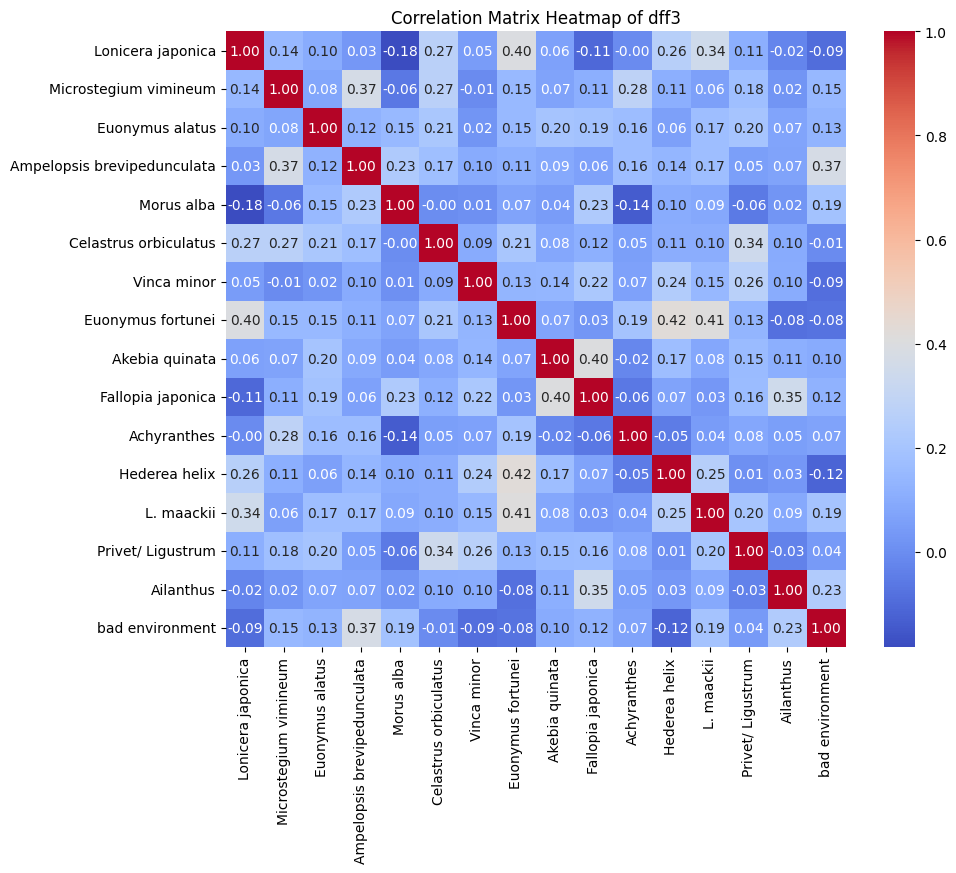

In [ ]:
# prompt: make a correlation and heatmap for dff3

# Assuming dff3 is your DataFrame
# Calculate the correlation matrix
correlation_matrix = dff3.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of dff3')
plt.show()

# Photos

###Invasive Species Photos

Saving 3BE7EA42-1940-43ED-996A-A16197249DAE.jpeg to 3BE7EA42-1940-43ED-996A-A16197249DAE.jpeg
Saving 73CFA663-BE46-4B4E-B67E-2B8092F20960.jpeg to 73CFA663-BE46-4B4E-B67E-2B8092F20960.jpeg
Saving 564A0A18-BEA8-408C-B788-E63EE493CC07.jpeg to 564A0A18-BEA8-408C-B788-E63EE493CC07.jpeg
Saving D51197BD-6113-4D36-A8DF-7EC92DCABDF5.jpeg to D51197BD-6113-4D36-A8DF-7EC92DCABDF5.jpeg
Saving E55189CC-2514-4D92-A46B-4096D3EAA06A.jpeg to E55189CC-2514-4D92-A46B-4096D3EAA06A.jpeg


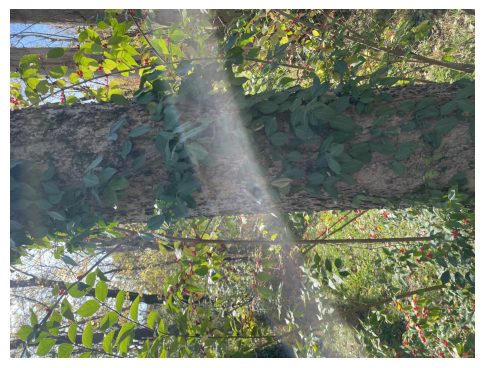

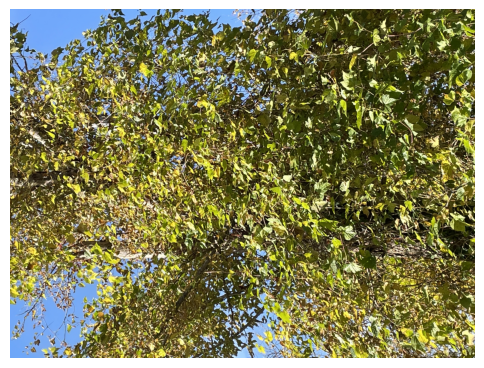

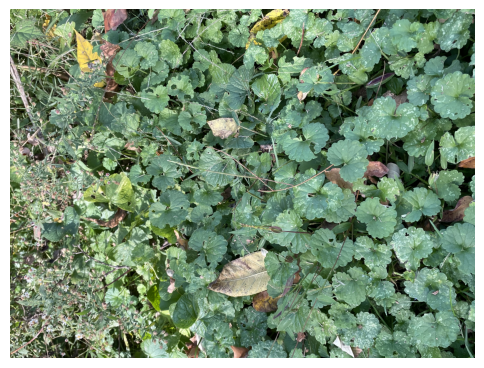

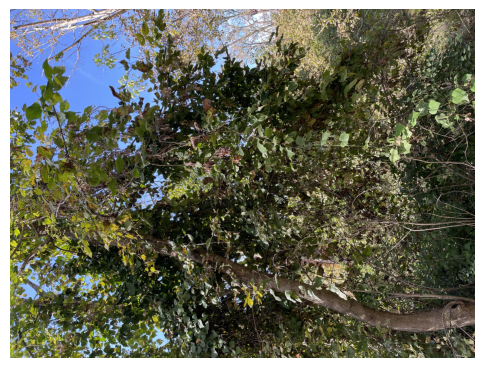

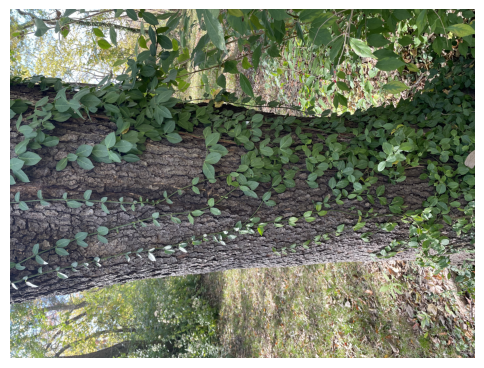

In [ ]:
#Invasive Species Pictures

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files


uploaded_files = list(files.upload().keys())


for file_name in uploaded_files:
  if file_name.lower().endswith(('.jpg', '.jpeg')):
    image = mpimg.imread(file_name)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

While it is clear that the invasive species has definitely come down since treatment of the park has started, there is still some notable cases throughout the part.
Further treatment throughout the park will be required to stay on top of this.

###Canopy Photos

Saving 53FDB9FA-DF5E-4994-922F-8BD2A1A5C6CF.jpeg to 53FDB9FA-DF5E-4994-922F-8BD2A1A5C6CF.jpeg
Saving B4D166A4-7235-453E-A61F-DEF985CF4116.jpeg to B4D166A4-7235-453E-A61F-DEF985CF4116.jpeg
Saving FEFFD353-0E5E-48D2-BFFE-D2FB2D9BB9AA.jpeg to FEFFD353-0E5E-48D2-BFFE-D2FB2D9BB9AA.jpeg


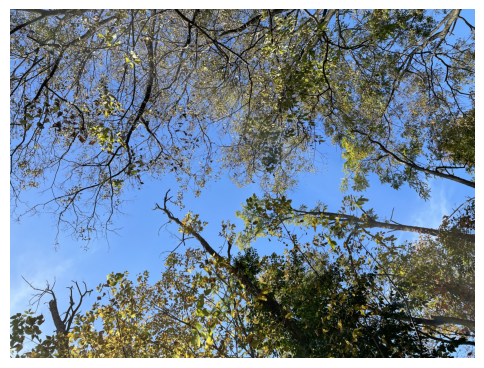

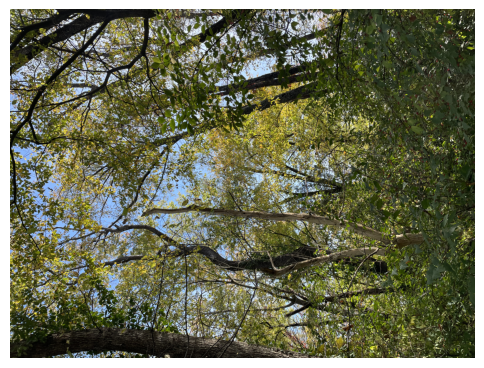

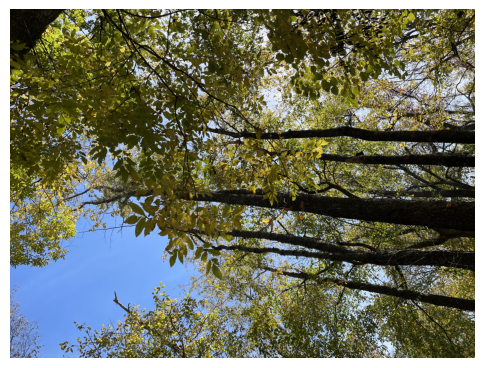

In [ ]:
#Canopy Pictures
uploaded_files2 = list(files.upload().keys())


for file_name in uploaded_files2:
  if file_name.lower().endswith(('.jpg', '.jpeg')):
    image = mpimg.imread(file_name)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Canopy cover could have some effects on both invasve species as well as our desired plant life. However, this seems to depend on location as the growth of the surrounding plant life is dependant on the coverage itself, namely the trees growing in the tremple stations. That said, there could definitely be some relation in regards to the undergrowth.

# Conclusions
### Summary

Akebia Quinata Dominance: It's thriving due to its tolerance for shade and drought.

Plot BTB3: Has the highest count of trees, saplings, and most invasive and dead plants. This suggests it's a hot spot for both desired and problematic species.

Plot NTB3: Has the least bad plants, potentially indicating effective management or less favorable conditions for invasive species.

Heatmap Insights: Euonymus fortunei and Hederea helix often grow together. Ampelopsis brevipedunculata prefers open, sunny areas.

Species Succession: Early successional species, which are fast-growing and first to appear, dominate. This category includes most invasive plants, especially shrubs.

Correlations: There's a strong link between trees, shrubs, and seedlings, and between saplings and shrubs. This interplay could be crucial in managing plant dynamics.

Canopy Effects: Canopy cover influences plant growth. Vine plants cover more than bush-like plants, affecting the ecosystem structure.

Management Need: Continued efforts are crucial to control invasive species and support desired plant growth. This requires careful monitoring and tailored strategies for different plots.

Cherokee Park's plant life is shaped by a mix of environmental conditions and species interactions. Tackling invasive species needs a nuanced approach, considering how different plants and environmental factors play off each other.

### Next steps (for Cherokee)
Targeted Treatment: Focus on BTB3 for invasive species control since it has the highest count of bad plants. Regular monitoring and active removal efforts will be key.

Continuous Monitoring: Keep a close watch on plots with the least bad plants, like NTB3, to ensure they stay that way. Regular checks will help catch any new invasions early.

Canopy Management: Since canopy cover impacts plant growth, adjusting canopy density might help manage both invasive and desired plant species. Experiment with small-scale canopy management in different plots to observe effects.

### Next steps (for us)
Species Interaction Study: Look deeper into the correlations between trees, shrubs, seedlings, and saplings. Understanding these relationships better can guide more effective planting and removal strategies.

Plant relationships: Further cleaning so that canopy and understory column can be used. Understanding the relationship between these columns and the invasive species columsn cna be helpful in understanding how these plants interact with one another.